# Support Vector Machine

In [1]:
# Import Liberaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# define X and Y colums
x=df.drop('species', axis=1)
y=df['species']

In [6]:
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.2)

In [7]:
model=SVC(kernel='rbf')
model.fit(x_train,y_train)

SVC()

In [18]:
model.predict([[5.1,3.5,4.4,0.2]])

c:\Users\CIS\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['versicolor'], dtype=object)

In [8]:
y_pred=model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0  7  0]
 [ 0  2 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.78      1.00      0.88         7
   virginica       1.00      0.85      0.92        13

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



Text(120.72222222222221, 0.5, 'Actual')

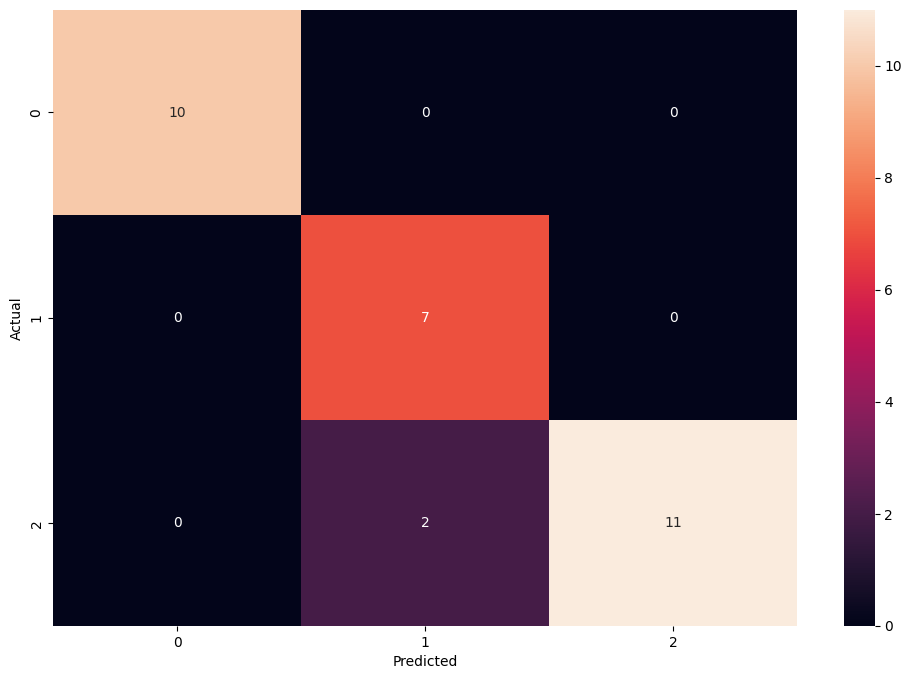

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Support Vector Machine Regression SVR

In [27]:
data=sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [28]:
X=data.drop('tip',axis=1)
Y=data['tip']

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   sex         244 non-null    category
 2   smoker      244 non-null    category
 3   day         244 non-null    category
 4   time        244 non-null    category
 5   size        244 non-null    int64   
dtypes: category(4), float64(1), int64(1)
memory usage: 5.5 KB


In [31]:
# Convert data into labels
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in X.columns:
    if X[col].dtypes=='category' or X[col].dtypes=='object':
        X[col]=le.fit_transform(X[col])

In [48]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42, test_size=0.2)

In [55]:
from sklearn.svm import SVR
model=SVR(kernel='linear')
model.fit(x_train,y_train)

SVR(kernel='linear')

In [56]:
y_pred=model.predict(x_test)
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(y_pred,y_test))
print(r2_score(y_pred,y_test))
print(np.sqrt(mean_squared_error(y_pred,y_test)))

0.6840586858804613
0.49534916113277006
0.827078403708174
